<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home
#Cannot replicate codes if you are working in a group. 



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to create a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [116]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
#must be able to explain what your code is doing in the exam

## 1. Load the data from file

---

In [117]:
#Opening a dataset in Python
df=pd.read_csv("../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv")

In [118]:
df.head(3)
#Printing top 3 information to see how the overall dataset looks like

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [119]:
#Obtaining column and varaibles and column information. Soon these information will allow me to 
#to other steps. 
df.shape

(270955, 18)

In [120]:
#Obtaining overall information on the given dataframe and whether variable is float, integer of object. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [121]:
#Obtaining description statistics. This will also allow me to see the missing values. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [122]:
df.isnull().sum()
#This data set is almost very clean. Not sure if any columns need to dropped. Country and 
#categorr is a string variable but they maybe used in the future in groupby commands.  

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [123]:
df.isnull().sum()
#you can see that there are 4 variables with missing values. Some of these items have unique identifier
# and I won't be dropping them. This code is a repeat code for #2.

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [124]:
#Renaming the variables to make coding easier in the future. 
df.rename(columns={
        'Store Number':'Store_Number',
        'Zip Code':'Zip_Code',
        'County Number':'County_Number',
        'Vendor Number': 'Vendor_Number',
        'Item Description':'Item_Description',
        'Bottle Volume (ml)':'Bottle_Volume_ml',
        'State Bottle Cost':'State_Bottle_Cost',
        'State Bottle Retail':'State_Bottle_Retail',
        'Bottles_Sold': 'Bottles_Sold',
        'Sale (Dollars)': 'Dollars_Sale',
        'Bottles Sold':'Bottles_Sold',
        'Volume Sold (Liters)': 'Volume_Sold_Liters',
        'Volume Sold (Gallons)': 'Volume_Sold_Gallons',
        'Category Name': 'Category_Name'
    }, inplace=True) 

### 3.2 Clean the columns

In [125]:
df.info()
#Checking to see if the variables are dropped and the name has been renamed. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                   270955 non-null object
Store_Number           270955 non-null int64
City                   270955 non-null object
Zip_Code               270955 non-null object
County_Number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
Category_Name          270323 non-null object
Vendor_Number          270955 non-null int64
Item Number            270955 non-null int64
Item_Description       270955 non-null object
Bottle_Volume_ml       270955 non-null int64
State_Bottle_Cost      270955 non-null object
State_Bottle_Retail    270955 non-null object
Bottles_Sold           270955 non-null int64
Dollars_Sale           270955 non-null object
Volume_Sold_Liters     270955 non-null float64
Volume_Sold_Gallons    270955 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 37.2+ MB

In [126]:
df['County_Number'].fillna(value=0, inplace=True)
df['Category'].fillna(value=0, inplace=True)
#Replaced missing values with 0 since we cannot take the mean for county number because it is a unique identifier. 

In [127]:
df.describe().T
#Did not drop County number because this has a unique identifier which may need to be used?

,count,mean,std,min,25%,50%,75%,max
Store_Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County_Number,270955.0,5.700416e+01,27.523405,0.00,31.0,62.00,77.00,99.00
Category,270955.0,1.043626e+06,52830.112852,0.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor_Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle_Volume_ml,270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles_Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume_Sold_Liters,270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume_Sold_Gallons,270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [128]:
df.isnull().sum()
#Missing values were replaced with 0 and some columns were dropped on previous section. 

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County_Number             0
County                 1077
Category                  0
Category_Name           632
Vendor_Number             0
Item Number               0
Item_Description          0
Bottle_Volume_ml          0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Dollars_Sale              0
Volume_Sold_Liters        0
Volume_Sold_Gallons       0
dtype: int64

In [129]:
#Dropping irrelevant variables that may not be used in the future. 
df.drop(['Zip_Code','Vendor_Number','Volume_Sold_Liters',], axis=1, inplace=True)

In [130]:
#Obtaining description statisitics to see how things look now that data cleaning has been performed. 
#Some data modification can happen in the later questions. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County_Number,270955.0,5.700416e+01,27.523405,0.00,31.0,62.00,77.00,99.00
Category,270955.0,1.043626e+06,52830.112852,0.00,1012200.0,1031200.00,1062310.00,1701100.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle_Volume_ml,270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles_Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume_Sold_Gallons,270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [131]:
#Seperating month and year form the date. 
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year']=df['Date'].dt.year
df

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,2.77,2,2016
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,0.92,6,2015
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,0.79,1,2016
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,0.53,11,2015


In [132]:
#Returning floats of dollars to non-dollar value. This code ws obtained from Full Analysis lecture.
df['Dollars_Sale'] = df['Dollars_Sale'].str.replace('$','')
df.Dollars_Sale = df.Dollars_Sale.convert_objects(convert_numeric=True)
df['State_Bottle_Retail'] = df['State_Bottle_Retail'].str.replace('$','')
df.State_Bottle_Retail = df.State_Bottle_Retail.convert_objects(convert_numeric=True)
df['State_Bottle_Cost'] = df['State_Bottle_Cost'].str.replace('$','')
df.State_Bottle_Cost = df.State_Bottle_Cost.convert_objects(convert_numeric=True)

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [133]:
#Checking to see if the above code has been executed.
df

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,750,13.75,20.63,2,41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,1000,12.59,18.89,24,453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,2.77,2,2016
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,0.79,1,2016
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [134]:
#Obtaining data for 2015 only. This also creates a new dataframe for 2015. 
df2015= df[(df.Year == 2015)] 
df2015

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,1.19,9,2015
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,2.77,10,2015
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,0.79,6,2015


In [114]:
df2015.groupby(['Store_Number','Year'])['Month'].nunique().reset_index()
#Obtained the above code from http://stackoverflow.com/questions/40024666/pandas-distinct-count-as-a-dataframe 
#There are stores open in 2016. Since we are focusing on 2015, only 2015 will be selected. 
#Since we are not doing regression analysis, I won't be dropping the stores that weren't open for 12 months in this assignment. 
#The reason is because, I do not want to drop any observations. Even if the stores were open for 1 months; it still
#made sales and this info will be used to obtain profit and total cost for the next question. 

,Store_Number,Year,Month
0,2106,2015,12
1,2113,2015,12
2,2130,2015,12
3,2152,2015,12
4,2178,2015,12
5,2190,2015,12
6,2191,2015,12
7,2200,2015,12
8,2205,2015,12
9,2228,2015,12


In [135]:
#Obtains number of stores open in 2015. 
group = df2015.groupby(['Year']).count()
print group

        Date  Store_Number    City  County_Number  County  Category  \
Year                                                                  
2015  218594        218594  218594         218594  218477    218594   

      Category_Name  Item Number  Item_Description  Bottle_Volume_ml  \
Year                                                                   
2015         218465       218594            218594            218594   

      State_Bottle_Cost  State_Bottle_Retail  Bottles_Sold  Dollars_Sale  \
Year                                                                       
2015             218594               218594        218594        218594   

      Volume_Sold_Gallons   Month  
Year                               
2015               218594  218594  


In [136]:
df[df['Year'] < 2016] 
#This shows number of months stores that were open in 2015 in an extended version. 

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,1.19,9,2015
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,2.77,10,2015
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,0.79,6,2015


In [137]:
df[df['Year'] > 2015]
#shows number of months the store was open in 2016. You notice that most stores were open for 3 months 

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,750,13.75,20.63,2,41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,1000,12.59,18.89,24,453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,2.77,2,2016
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,0.79,1,2016
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,750,10.00,15.00,12,180.00,2.38,2,2016
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,1000,7.50,11.25,12,135.00,3.17,1,2016
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,200,1.13,1.70,48,81.60,2.54,2,2016
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,750,3.37,5.06,12,60.72,2.38,3,2016
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,375,6.50,9.75,12,117.00,1.19,1,2016
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,1000,16.16,24.24,12,290.88,3.17,3,2016



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [138]:
#Obtaining Dollars Sale will tell you liquor sales for each store in 2015. 
#Note that this values are already multiplied by the bottles sold and state bottle retail
df2015= df[(df.Year == 2015)] 
df2015

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,1.19,9,2015
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,2.77,10,2015
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,0.79,6,2015


In [139]:
#Dollars Sale for each store in 2016
#Note that this values are already multiplied by the bottles sold and state bottle retail
df2016= df[(df.Year == 2016)] 
df2016

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,750,13.75,20.63,2,41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,1000,12.59,18.89,24,453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,2.77,2,2016
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,0.79,1,2016
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,750,10.00,15.00,12,180.00,2.38,2,2016
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,1000,7.50,11.25,12,135.00,3.17,1,2016
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,200,1.13,1.70,48,81.60,2.54,2,2016
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,750,3.37,5.06,12,60.72,2.38,3,2016
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,375,6.50,9.75,12,117.00,1.19,1,2016
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,1000,16.16,24.24,12,290.88,3.17,3,2016


In [141]:
#Showing total sales for 2015. This aggregates every store. 
df2015.Dollars_Sale.sum()

28527245.39000142

In [142]:
store_sale=df2015.groupby(['Store_Number']).sum()['Dollars_Sale'].reset_index()
print store_sale
#Total Dollars Sale for each store in 2015 and 2016

      Store_Number  Dollars_Sale
0             2106     146326.22
1             2113       9310.22
2             2130     111871.43
3             2152       7721.08
4             2178      24324.18
5             2190     121689.06
6             2191     125093.49
7             2200      22811.55
8             2205      24681.39
9             2228      17462.07
10            2233      29553.34
11            2238      11762.56
12            2248      67682.06
13            2285      76927.11
14            2290      56514.43
15            2327      10245.14
16            2353      54000.55
17            2367       5010.83
18            2413      90065.02
19            2445       7189.48
20            2448      17740.70
21            2459       7352.33
22            2460      33731.76
23            2465      25831.80
24            2475      10681.07
25            2478      19840.65
26            2487      28900.96
27            2498       2259.67
28            2500     149121.63
29        

### 5.2 Calculate the profit each store is making in 2015.


In [28]:
sale2015=df2015.groupby(['Store_Number']).sum()['Dollars_Sale'].reset_index() 
print sale2015
#this is showing 2015 sale for each other store number

      Store_Number  Dollars_Sale
0             2106     146326.22
1             2113       9310.22
2             2130     111871.43
3             2152       7721.08
4             2178      24324.18
5             2190     121689.06
6             2191     125093.49
7             2200      22811.55
8             2205      24681.39
9             2228      17462.07
10            2233      29553.34
11            2238      11762.56
12            2248      67682.06
13            2285      76927.11
14            2290      56514.43
15            2327      10245.14
16            2353      54000.55
17            2367       5010.83
18            2413      90065.02
19            2445       7189.48
20            2448      17740.70
21            2459       7352.33
22            2460      33731.76
23            2465      25831.80
24            2475      10681.07
25            2478      19840.65
26            2487      28900.96
27            2498       2259.67
28            2500     149121.63
29        

In [143]:
df2015.info()
#Making sure all my necessary values are in float to calculate the profit for this section. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218594 entries, 0 to 270954
Data columns (total 17 columns):
Date                   218594 non-null datetime64[ns]
Store_Number           218594 non-null int64
City                   218594 non-null object
County_Number          218594 non-null float64
County                 218477 non-null object
Category               218594 non-null float64
Category_Name          218465 non-null object
Item Number            218594 non-null int64
Item_Description       218594 non-null object
Bottle_Volume_ml       218594 non-null int64
State_Bottle_Cost      218594 non-null float64
State_Bottle_Retail    218594 non-null float64
Bottles_Sold           218594 non-null int64
Dollars_Sale           218594 non-null float64
Volume_Sold_Gallons    218594 non-null float64
Month                  218594 non-null int64
Year                   218594 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(4)
memory usage: 30.0+ MB


In [144]:
#Creating a new column called Total Cost. This will be used to calculate profit. 
df2015['Total_Cost'] = df2015['Bottles_Sold']*df2015['State_Bottle_Cost']
df2015

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year,Total_Cost
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015,54.00
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015,86.40
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015,79.92
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015,19.98
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015,31.50
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015,15.24
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,1.19,9,2015,157.44
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,2.77,10,2015,36.00
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015,8.92
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,0.79,6,2015,18.00


In [145]:
#Creating a new column called Profit. Taking the difference between dollars sale and total cost will give me a profit value 
df2015['Profit'] = df2015['Dollars_Sale']-df2015['Total_Cost']
df2015

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015,54.00,27.00
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015,86.40,43.20
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015,79.92,39.96
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015,19.98,9.99
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015,31.50,15.76
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,0.53,11,2015,15.24,7.62
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,1.19,9,2015,157.44,78.72
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,2.77,10,2015,36.00,19.50
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,0.79,6,2015,18.00,9.00


In [150]:
#Same method is being carried out here for 2016 dataframe. 
df2016['Total_Cost'] = df2016['Bottles_Sold']*df2016['State_Bottle_Cost']
df2016['Profit'] = df2016['Dollars_Sale']-df2016['Total_Cost']
df2016

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,750,13.75,20.63,2,41.26,0.40,3,2016,27.50,13.76
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,1000,12.59,18.89,24,453.36,6.34,2,2016,302.16,151.20
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,2.77,2,2016,57.00,28.50
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,0.79,1,2016,45.96,23.00
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,750,10.00,15.00,12,180.00,2.38,2,2016,120.00,60.00
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,1000,7.50,11.25,12,135.00,3.17,1,2016,90.00,45.00
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,200,1.13,1.70,48,81.60,2.54,2,2016,54.24,27.36
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,750,3.37,5.06,12,60.72,2.38,3,2016,40.44,20.28
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,375,6.50,9.75,12,117.00,1.19,1,2016,78.00,39.00
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,1000,16.16,24.24,12,290.88,3.17,3,2016,193.92,96.96


In [180]:
#aggregated proit for each store grouped by Store Number
df2015.groupby(['Store_Number']).sum()['Profit'].reset_index()

,Store_Number,Profit
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70
5,2190,40617.73
6,2191,41744.39
7,2200,7653.47
8,2205,8244.13
9,2228,5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [151]:
df2015.groupby(['County'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()
#According to the description below, Polk has made the most profit compared to any other counties in Iowa.

,County,Profit
0,Polk,2139175.98
1,Linn,870999.67
2,Scott,682628.41
3,Johnson,574499.31
4,Black Hawk,529097.01
5,Pottawattamie,338436.55
6,Woodbury,334297.05
7,Dubuque,297710.63
8,Story,296680.57
9,Cerro Gordo,190844.15


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [146]:
#Forgot to do this part earlier in part 3. 
df2015.rename(columns={
        'Volume Sold (Gallons)': 'Volume_Sold_Gallons'
    }, inplace=True)

In [147]:
np.corrcoef(df2015["Profit"], df2015["Volume_Sold_Gallons"])
#Using corr.coef to show the correlation between Profit and Volume Sold in Gallons. 
#there is a high correlation between gallons sold and profit. 

array([[ 1.        ,  0.84814975],
       [ 0.84814975,  1.        ]])

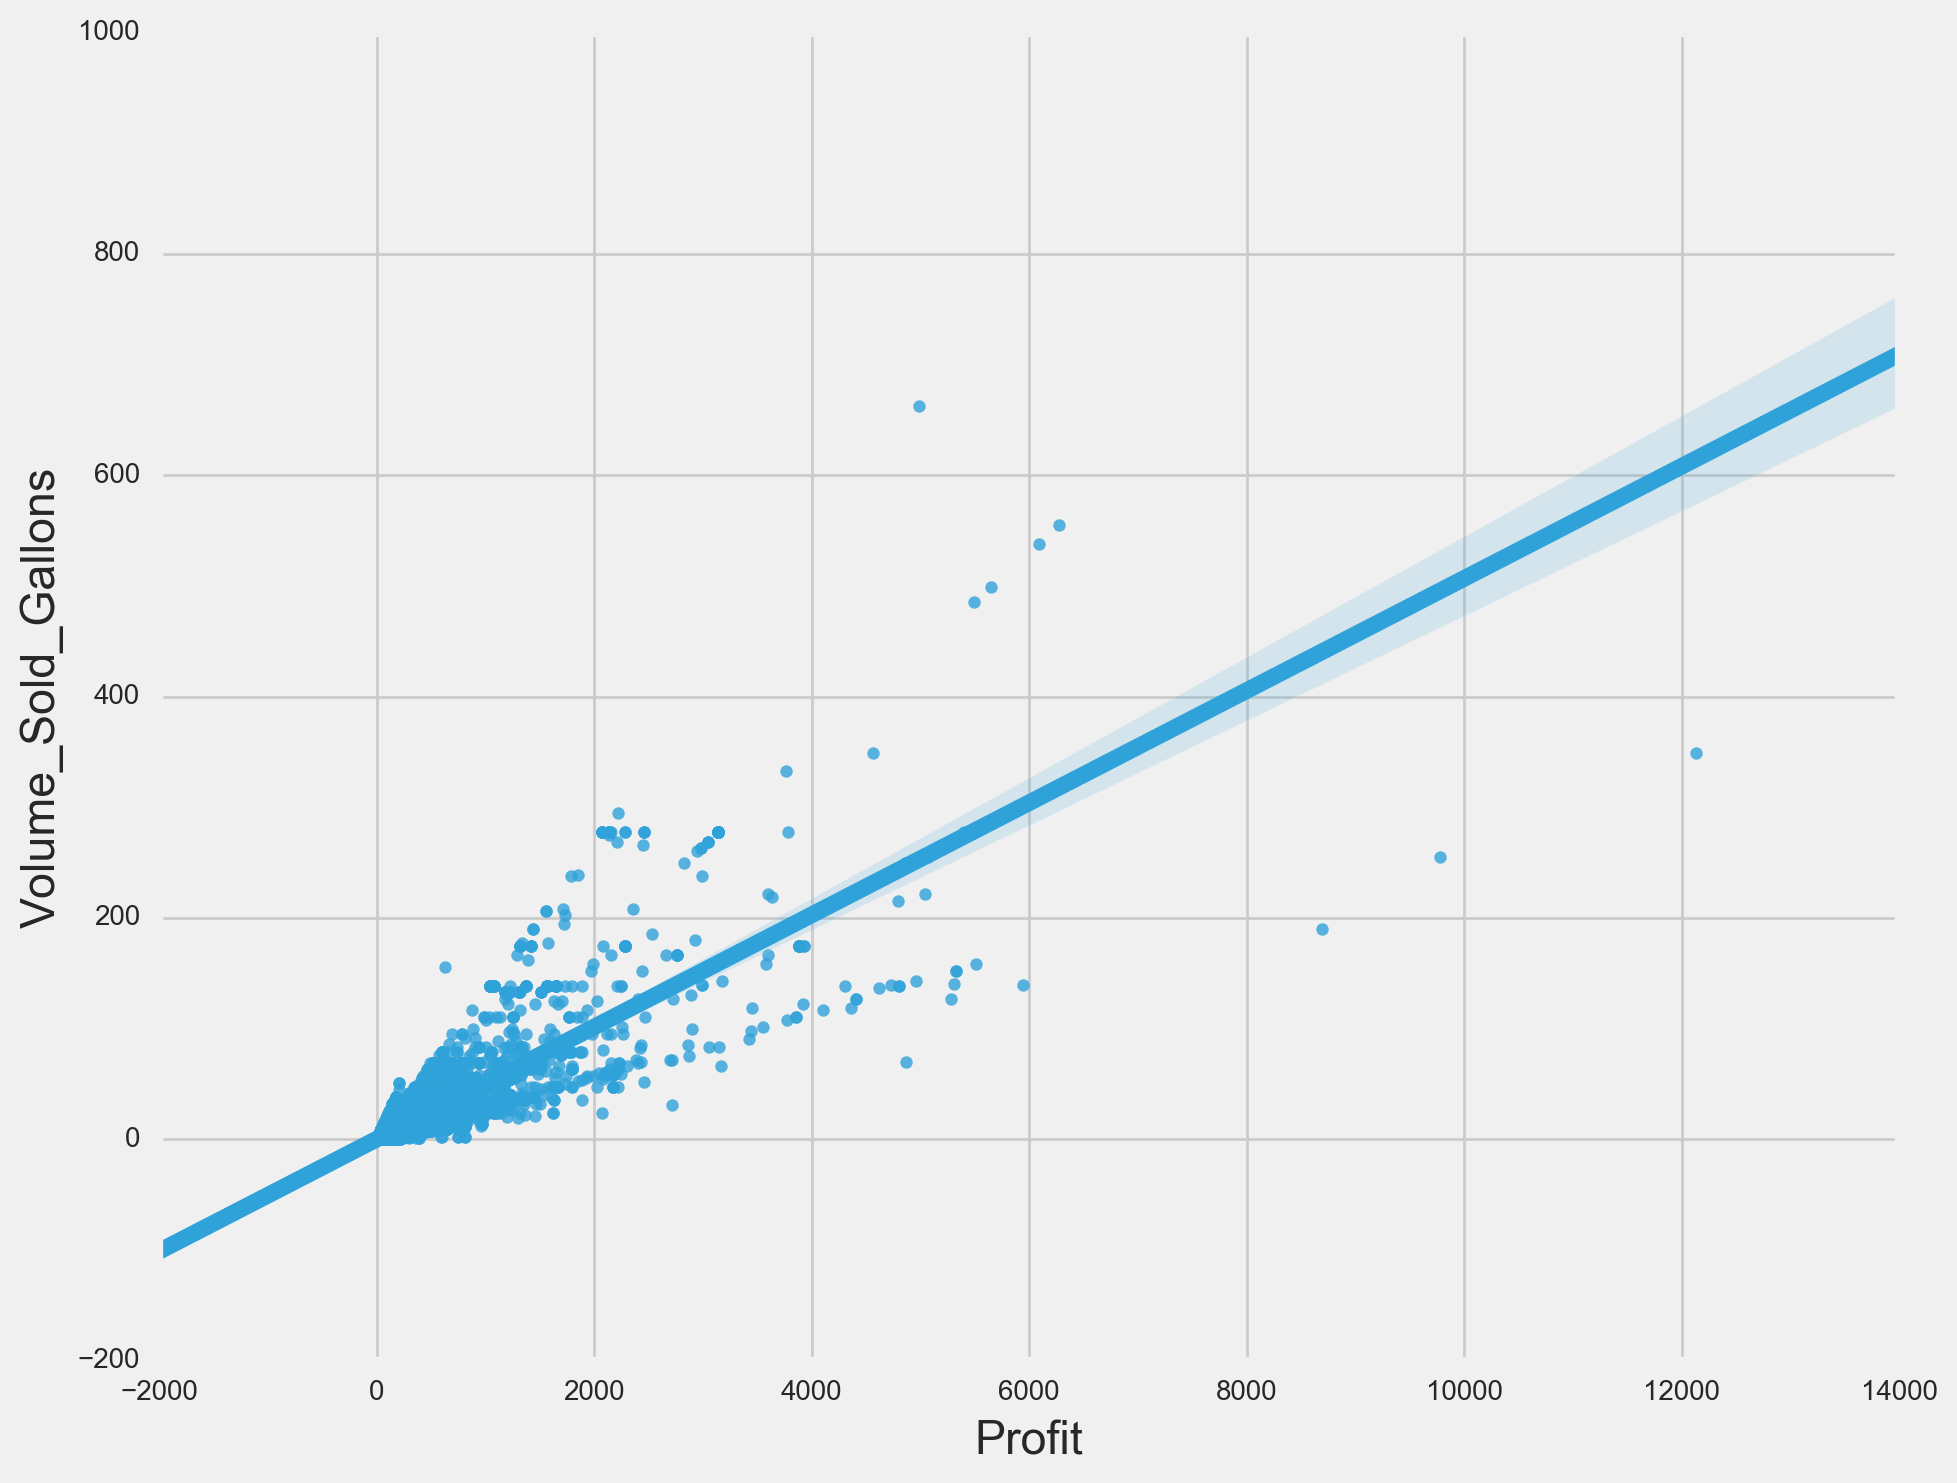

In [148]:
#Code obtained from lecture note. The visual shows positive increasing trend between Volumes Sold in Gallons and Profit .
fig = plt.figure(figsize=(10,8))
sns.regplot(df2015['Profit'], df2015['Volume_Sold_Gallons'], data=df2015)
plt.show()

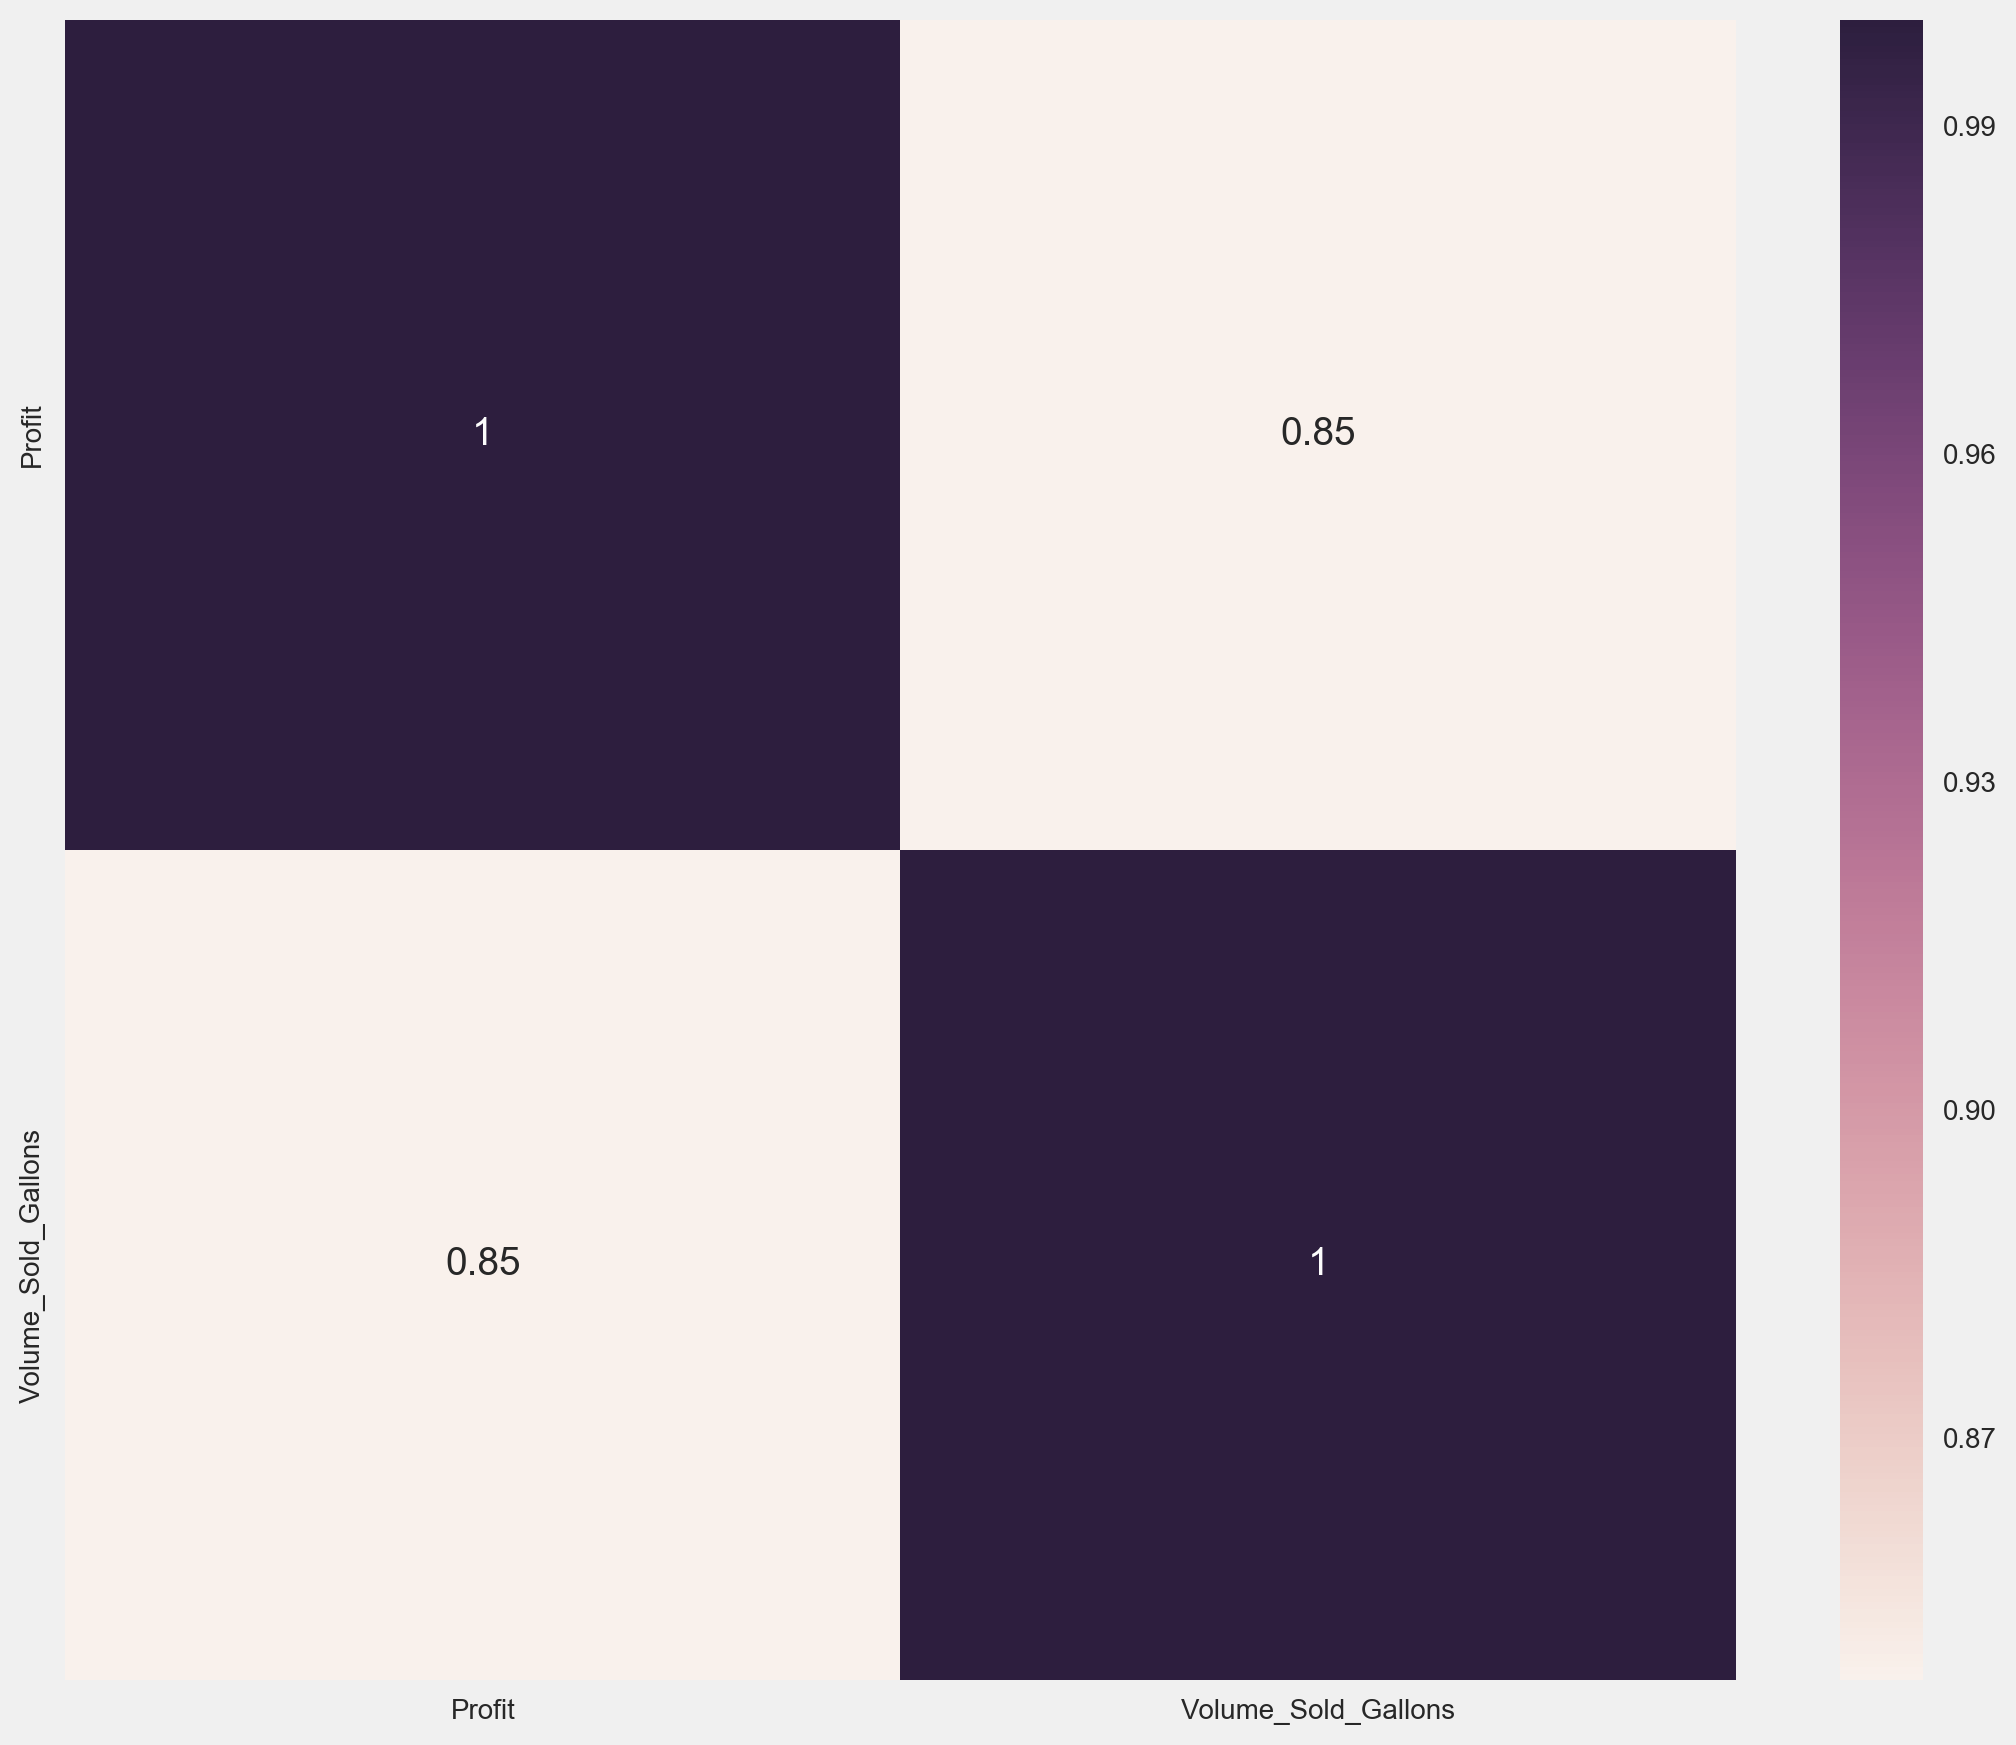

In [36]:
#Extra visualization to show the correlation map. 
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(df2015[['Profit', 'Volume_Sold_Gallons']].corr(),annot=True, ax=ax)
plt.show()

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [152]:
df1 = df2015.append(df2016) #merging dataframes for 2015 and 2016 since we are no longer concentrating on 2015 alone. 
df1.isnull().sum()

Date                      0
Store_Number              0
City                      0
County_Number             0
County                 1077
Category                  0
Category_Name           632
Item Number               0
Item_Description          0
Bottle_Volume_ml          0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Dollars_Sale              0
Volume_Sold_Gallons       0
Month                     0
Year                      0
Total_Cost                0
Profit                    0
dtype: int64

In [153]:
#Obtaining information on which types of alcohol sold the most in each year. 
df1.groupby(['Category_Name','Year'], sort=True)[['Volume_Sold_Gallons']].mean().sort_values(by=['Volume_Sold_Gallons'], ascending=False).reset_index()

,Category_Name,Year,Volume_Sold_Gallons
0,DISTILLED SPIRITS SPECIALTY,2016,5.347056
1,TRIPLE SEC,2015,4.415950
2,TRIPLE SEC,2016,3.911685
3,DECANTERS & SPECIALTY PACKAGES,2016,3.795152
4,VODKA 80 PROOF,2015,3.768528
5,AMARETTO - IMPORTED,2015,3.570000
6,VODKA 80 PROOF,2016,3.447559
7,GRAPE SCHNAPPS,2015,3.356882
8,CANADIAN WHISKIES,2015,3.353608
9,100 PROOF VODKA,2016,3.348185


In [181]:
#The below code was obtained from Shiv Gunjal. 
#The code allows us to categorize each Category name into one group by creating a column called Drinks
df1['Drinks'] = np.where(df1['Category_Name'].str.contains('VODKA') , "VODKA",
           np.where(df1['Category_Name'].str.contains('WHISKIES'), "WHISKY",
           np.where(df1['Category_Name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
           np.where(df1['Category_Name'].str.contains('GINS'), "GIN",
           np.where(df1['Category_Name'].str.contains('SCOTCH'), "SCOTCH",
           np.where(df1['Category_Name'].str.contains('BRANDIES'), "BRANDY",
           np.where(df1['Category_Name'].str.contains('RUM'), "RUM", "OTHER" )))))))
df1.groupby(['Drinks']).count()['Category'].reset_index()

,Drinks,Category
0,BRANDY,15044
1,GIN,9917
2,OTHER,54870
3,RUM,32753
4,SCHNAPPS,14564
5,SCOTCH,2288
6,VODKA,70577
7,WHISKY,70942


In [40]:
df1
#checking to see if the new column has been added onto our dataframe. 

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item Number,...,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit,Drinks
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.00,2.38,11,2015,54.00,27.00,BRANDY
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,10.80,12,129.60,21.00,5.55,8,2015,86.40,43.20,VODKA
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,19.98,6,119.88,10.50,2.77,4,2015,79.92,39.96,GIN
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,9.99,3,29.97,2.25,0.59,8,2015,19.98,9.99,BRANDY
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,23.63,2,47.26,3.50,0.92,6,2015,31.50,15.76,WHISKY
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,11.43,2,22.86,2.00,0.53,11,2015,15.24,7.62,SCHNAPPS
10,2015-09-28,2648,WEST DES MOINES,50265,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,19235,...,39.36,6,236.16,4.50,1.19,9,2015,157.44,78.72,WHISKY
11,2015-10-28,2600,OSKALOOSA,52577,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,57148,...,9.25,6,55.50,10.50,2.77,10,2015,36.00,19.50,OTHER
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,...,13.38,1,13.38,1.75,0.46,1,2015,8.92,4.46,WHISKY
15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,4,27.00,3.00,0.79,6,2015,18.00,9.00,BRANDY


### 5.6 Do relationships exist between the broader liquor type and profit?

In [182]:
df1.groupby(['Drinks'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()
#You can see that Whisky sells more compared to any other drinks

,Drinks,Profit
0,WHISKY,3.536974e+06
1,VODKA,2.836226e+06
2,OTHER,2.433698e+06
3,RUM,1.525286e+06
4,BRANDY,4.877834e+05
5,SCHNAPPS,4.234070e+05
6,GIN,3.065027e+05
7,SCOTCH,1.275882e+05


In [183]:
df1.groupby(['Drinks'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index()
#This is to confirm that Scotch sells the most. 
#Since you cannot obtain correlation coef. for string and profit values, I used groupby command 
#on the combined dataset to observe positive relationship between type and profit. 

,Drinks,Dollars_Sale
0,WHISKY,1.055064e+07
1,VODKA,8.486174e+06
2,OTHER,7.288225e+06
3,RUM,4.570241e+06
4,BRANDY,1.461646e+06
5,SCHNAPPS,1.269781e+06
6,GIN,9.175668e+05
7,SCOTCH,3.824738e+05



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [81]:
df1.groupby(['Item_Description','Dollars_Sale'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()
#This is a raw dataframe. This will need to be cleaned and combined

,Item_Description,Dollars_Sale,Profit
0,Captain Morgan Original Spiced,162.00,63450.00
1,Crown Royal,270.00,63000.00
2,Fireball Cinnamon Whiskey,161.64,55388.64
3,Jack Daniels Old #7 Black Lbl,271.32,47049.60
4,Captain Morgan Spiced Rum,211.56,45722.88
5,Absolut Swedish Vodka 80 Prf,206.88,42780.00
6,Smirnoff Vodka 80 Prf,148.56,40738.32
7,Black Velvet,94.20,40557.60
8,Hennessy Vs Cognac,341.88,38304.00
9,Jack Daniels Old #7 Black Lbl,330.84,37495.20


In [43]:
#Creating a new column, Brand, onto the dataframe and sorting item description by alphabetical order. 
#Using groupby command and sorting it by Dollar Sale give us which brand sells the most. 
df1['Brand'] = df1['Item_Description'].str.extract('([A-Z]\w{0,})', expand=True)=> #Obained hint from Shiv but 
#used (https://chrisalbon.com/python/pandas_regex_to_create_columns.html) for the code to extract column words. 
df1.groupby(['Brand'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index()

,Brand,Dollars_Sale
0,Captain,2231442.77
1,Black,1935039.73
2,Crown,1713049.47
3,Jack,1584096.90
4,Fireball,1294809.86
5,Smirnoff,998066.87
6,Absolut,965679.08
7,Jose,871152.86
8,Bacardi,858505.45
9,Hawkeye,825425.37


In [44]:
#Using groupby to sort the brand by profit. This still shows that Captain, Black and Crown are in hgh demand and brings in the high profit. 
df1.groupby(['Brand'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()

,Brand,Profit
0,Captain,743992.89
1,Black,658440.88
2,Crown,571096.18
3,Jack,528155.17
4,Fireball,431752.94
5,Smirnoff,332939.93
6,Absolut,322053.72
7,Jose,290435.01
8,Bacardi,287287.00
9,Hawkeye,275380.55


In [155]:
np.corrcoef(df1["Profit"], df1["Dollars_Sale"])
#You can see the positive corr.coef between Dollar Sale and Profit for the combined dataframe. The above summary table shows
#that Captian, Black, Crown and Jack brings in the profit. Since dollars sale is highly correlated with 
#profit the corr. coef is close to 1. This method is being used as a backup to my previous statement.
#The only problem we may have is that the table shows summed value but the corr.coef is showing each individual. 

array([[ 1.        ,  0.99979963],
       [ 0.99979963,  1.        ]])

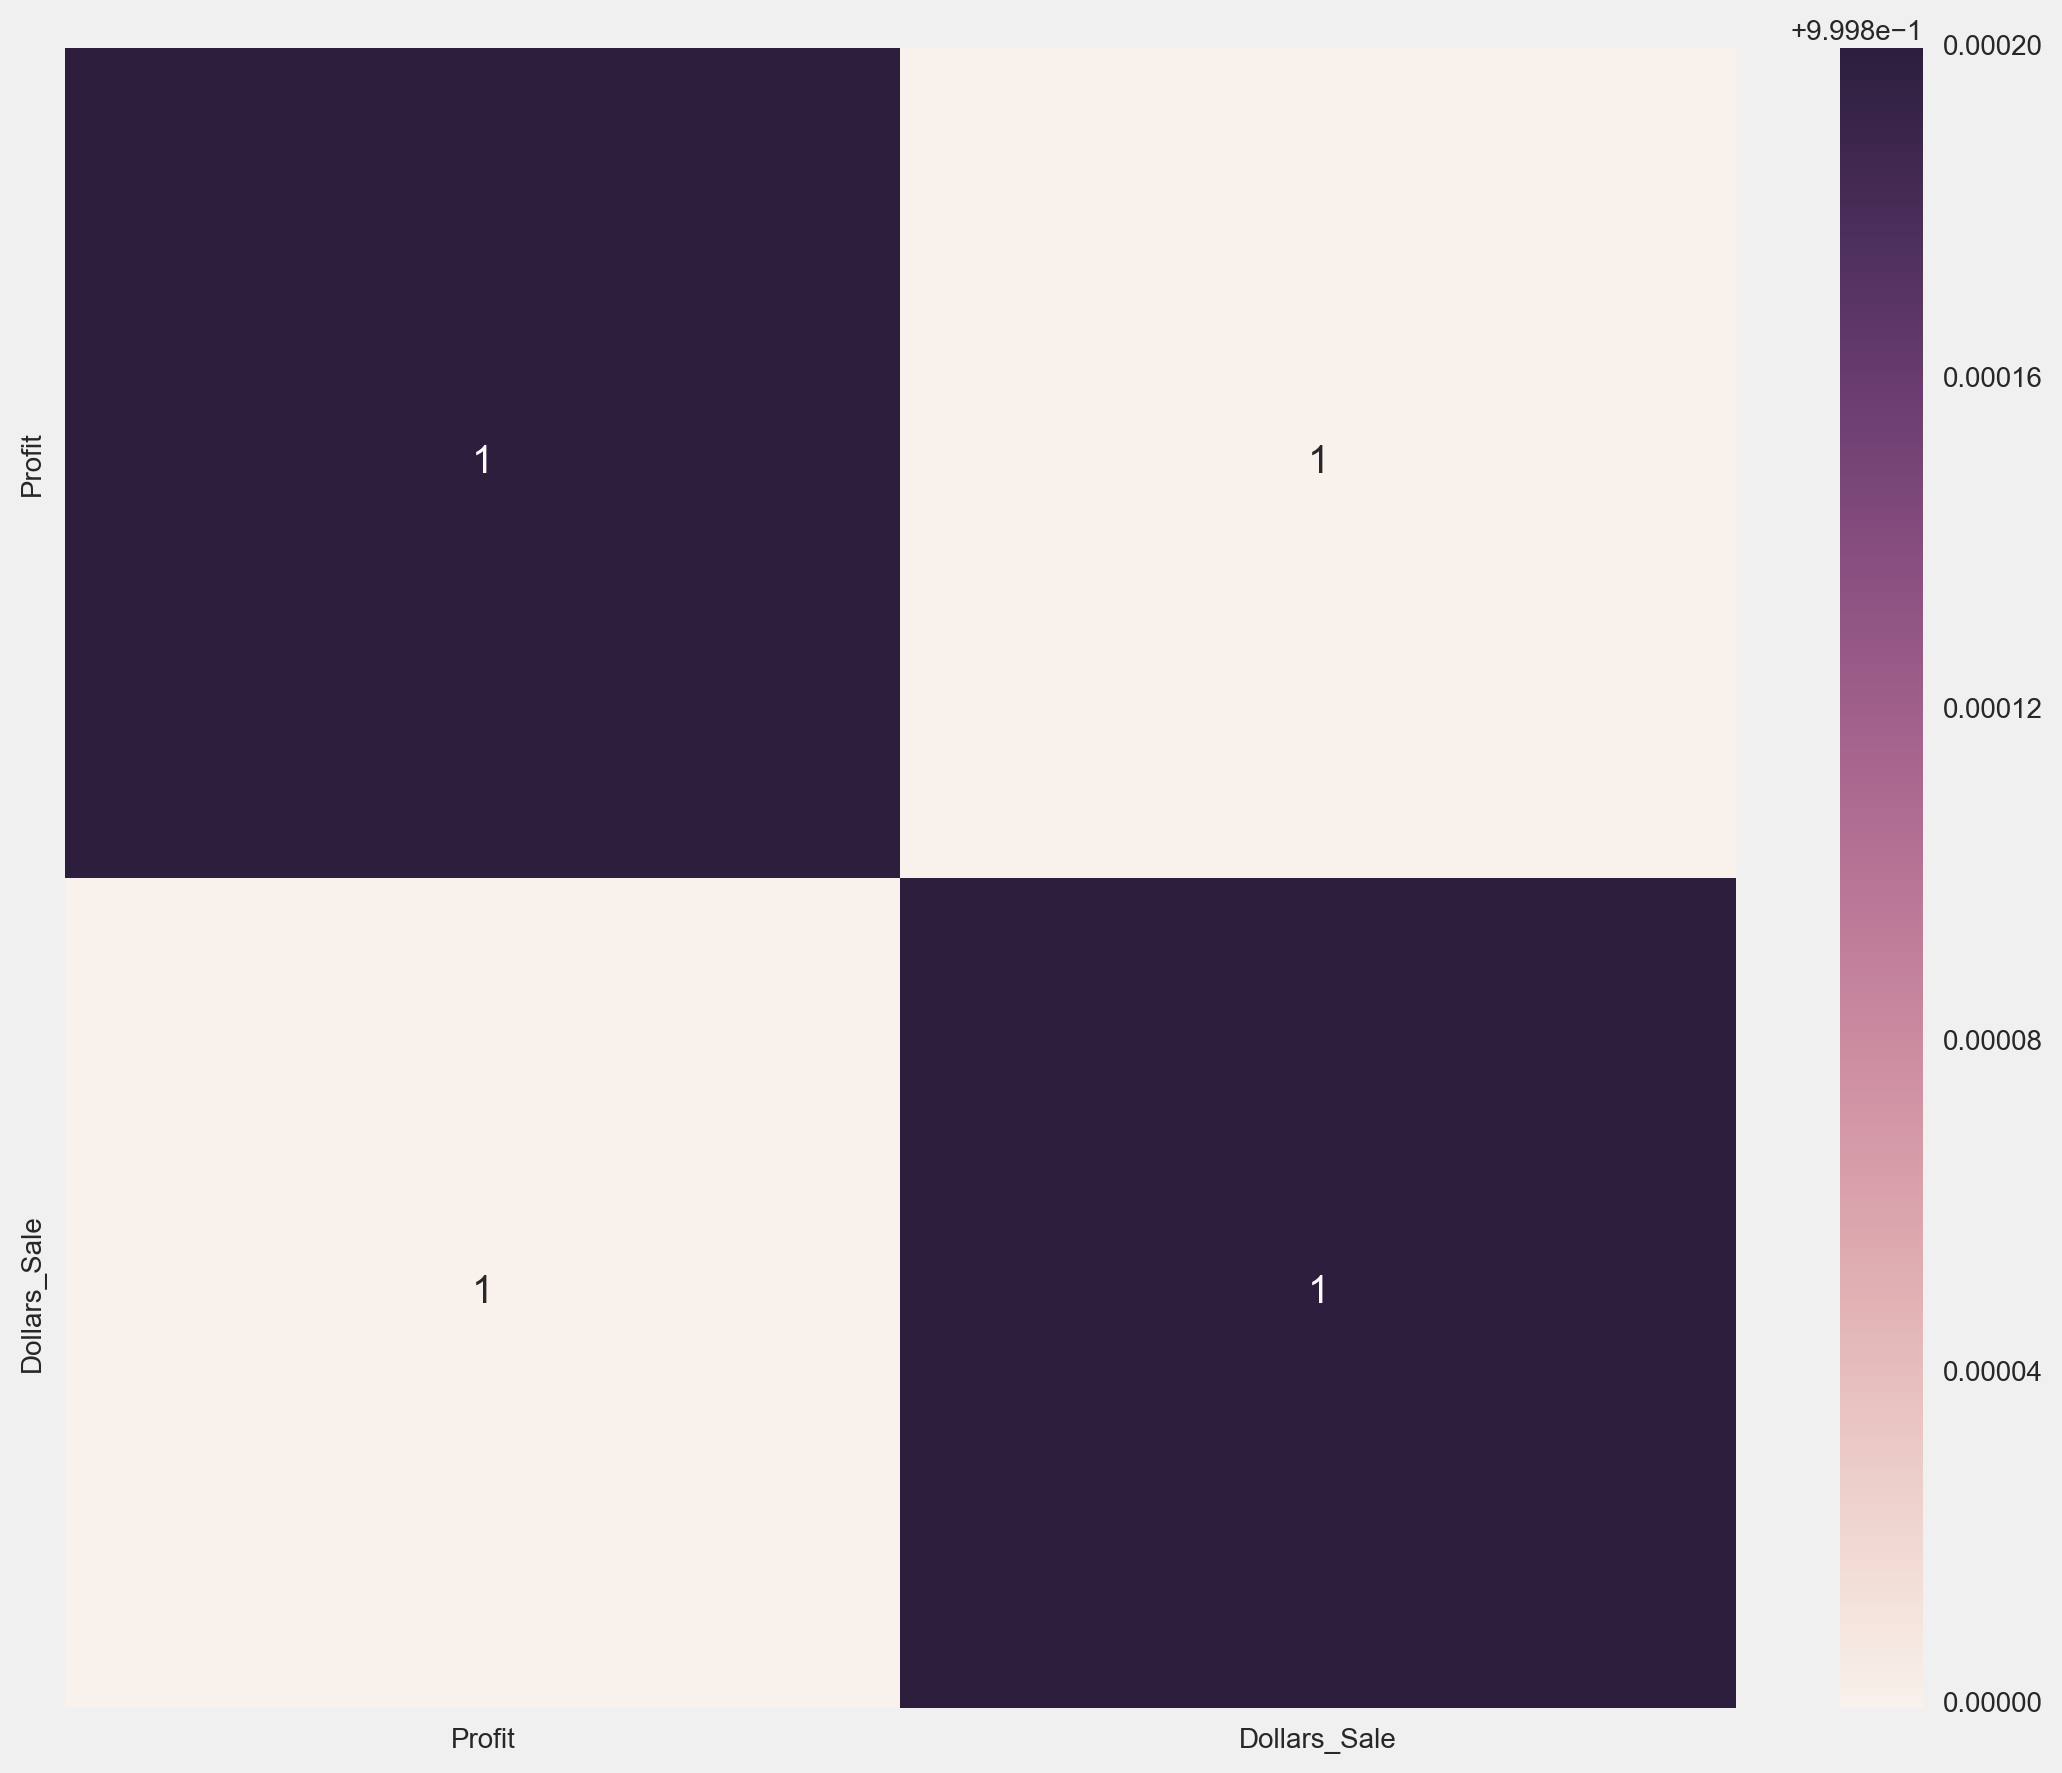

In [46]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(df1[['Profit', 'Dollars_Sale']].corr(),annot=True, ax=ax)
plt.show()

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [176]:
df1.groupby(['Drinks', 'County'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index().head(10)

,Drinks,County,Dollars_Sale
0,VODKA,Polk,2096808.64
1,WHISKY,Polk,2023454.02
2,OTHER,Polk,1817446.99
3,RUM,Polk,893766.85
4,WHISKY,Linn,835371.46
5,VODKA,Linn,808979.51
6,OTHER,Linn,686846.83
7,WHISKY,Scott,652839.30
8,VODKA,Scott,618589.05
9,WHISKY,Johnson,587100.31


In [175]:
df1.groupby(['Drinks', 'County'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index().head(10)

,Drinks,County,Profit
0,VODKA,Polk,700807.79
1,WHISKY,Polk,676610.62
2,OTHER,Polk,606715.78
3,RUM,Polk,298263.15
4,WHISKY,Linn,279721.88
5,VODKA,Linn,270179.17
6,OTHER,Linn,229341.70
7,WHISKY,Scott,218044.74
8,VODKA,Scott,206556.48
9,WHISKY,Johnson,196204.60


In [184]:
#Grouping by drink type and dollars sale for each to see if the result is consistent with the previous table. 
df1.groupby(['Drinks'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index().head(10)

,Drinks,Dollars_Sale
0,WHISKY,1.055064e+07
1,VODKA,8.486174e+06
2,OTHER,7.288225e+06
3,RUM,4.570241e+06
4,BRANDY,1.461646e+06
5,SCHNAPPS,1.269781e+06
6,GIN,9.175668e+05
7,SCOTCH,3.824738e+05



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [163]:
#Creating a new df for the combined dataset and call if dfQ1. 
dfQ1= df1[(df1.Month <4)] 
dfQ1

,Date,Store_Number,City,County_Number,County,Category,Category_Name,Item Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Dollars_Sale,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit,Drinks
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46,WHISKY
19,2015-03-04,2614,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,2.77,3,2015,59.82,29.94,WHISKY
20,2015-01-16,2590,CEDAR RAPIDS,57.0,Linn,1031200.0,VODKA FLAVORED,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,0.40,1,2015,28.50,14.26,VODKA
21,2015-01-13,3942,TOLEDO,86.0,Tama,1012100.0,CANADIAN WHISKIES,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,2.38,1,2015,62.76,31.44,WHISKY
22,2015-03-24,3981,SIOUX CENTER,84.0,Sioux,1011100.0,BLENDED WHISKIES,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,2.38,3,2015,84.00,42.00,WHISKY
25,2015-02-03,3390,MILFORD,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,26827,Jack Daniels Old #7 Black Lbl,1000,17.90,26.85,24,644.40,6.34,2,2015,429.60,214.80,WHISKY
29,2015-01-14,2545,IOWA CITY,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,66199,Piehole Apple Pie Mini,500,4.90,7.35,1,7.35,0.13,1,2015,4.90,2.45,OTHER
31,2015-01-12,2555,KEOKUK,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,73533,Dekuyper 03,750,12.07,18.11,2,36.22,0.40,1,2015,24.14,12.08,OTHER
32,2015-01-16,2549,INDIANOLA,91.0,Warren,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,1,2015,86.40,43.20,VODKA
33,2015-01-13,2644,FORT DODGE,94.0,Webster,1081305.0,APPLE SCHNAPPS,82607,Dekuyper Sour Apple,1000,7.62,11.43,12,137.16,3.17,1,2015,91.44,45.72,SCHNAPPS


In [49]:
#Creating a new dataframe for the 1st QRT in 2015. 
df2015Q1= dfQ1[(dfQ1.Year==2015)]
df2015Q1

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item Number,...,Bottles_Sold,Dollars_Sale,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit,Drinks,Brand
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,...,1,13.38,1.75,0.46,1,2015,8.92,4.46,WHISKY,Windsor
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,...,6,89.76,10.50,2.77,3,2015,59.82,29.94,WHISKY,Lord
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,...,2,42.76,1.50,0.40,1,2015,28.50,14.26,VODKA,North
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,...,12,94.20,9.00,2.38,1,2015,62.76,31.44,WHISKY,Black
22,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,...,12,126.00,9.00,2.38,3,2015,84.00,42.00,WHISKY,Seagrams
25,2015-02-03,3390,MILFORD,51351,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,85,26827,...,24,644.40,24.00,6.34,2,2015,429.60,214.80,WHISKY,Jack
29,2015-01-14,2545,IOWA CITY,52245,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,260,66199,...,1,7.35,0.50,0.13,1,2015,4.90,2.45,OTHER,Piehole
31,2015-01-12,2555,KEOKUK,52632,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,73533,...,2,36.22,1.50,0.40,1,2015,24.14,12.08,OTHER,Dekuyper
32,2015-01-16,2549,INDIANOLA,50125,91.0,Warren,1031080.0,VODKA 80 PROOF,297,35918,...,12,129.60,21.00,5.55,1,2015,86.40,43.20,VODKA,Five
33,2015-01-13,2644,FORT DODGE,50501,94.0,Webster,1081305.0,APPLE SCHNAPPS,65,82607,...,12,137.16,12.00,3.17,1,2015,91.44,45.72,SCHNAPPS,Dekuyper


In [50]:
#Creating a new dataframe for the 1st QRT in 2016. 
df2016Q1= dfQ1[(dfQ1.Year==2016)]
df2016Q1

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item Number,...,Bottles_Sold,Dollars_Sale,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Year,Total_Cost,Profit,Drinks,Brand
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,2,41.26,1.50,0.40,3,2016,27.50,13.76,WHISKY,Tin
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,24,453.36,24.00,6.34,2,2016,302.16,151.20,WHISKY,Jim
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,6,85.50,10.50,2.77,2,2016,57.00,28.50,OTHER,Ultimate
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,4,68.96,3.00,0.79,1,2016,45.96,23.00,VODKA,Absolut
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,...,12,180.00,9.00,2.38,2,2016,120.00,60.00,SCHNAPPS,Kinky
14,2016-01-04,2670,CORALVILLE,52241,52.0,Johnson,1031200.0,VODKA FLAVORED,380,41705,...,12,135.00,12.00,3.17,1,2016,90.00,45.00,VODKA,Uv
16,2016-02-25,2130,WATERLOO,50703,7.0,Black Hawk,1031100.0,100 PROOF VODKA,297,35913,...,48,81.60,9.60,2.54,2,2016,54.24,27.36,VODKA,Five
24,2016-03-14,2618,CEDAR RAPIDS,52402,57.0,Linn,1031080.0,VODKA 80 PROOF,297,35926,...,12,60.72,9.00,2.38,3,2016,40.44,20.28,VODKA,Five
38,2016-01-27,2637,DAVENPORT,52804,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,205,77759,...,12,117.00,4.50,1.19,1,2016,78.00,39.00,OTHER,Viniq
39,2016-03-07,2633,DES MOINES,50320,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,461,22157,...,12,290.88,12.00,3.17,3,2016,193.92,96.96,WHISKY,Wild


In [74]:
#Renaming Dollars Sale so you I can combine to calculate the growth rate. 
#Using grouby to see which county has the higher sale values. This will allow us to calculate the growth rate. 
Q1_2015=df2015Q1.groupby(['County'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index()
Q1_2015.rename(columns={
        'Dollars_Sale':'Sales2015'
    }, inplace=True) 
Q1_2015

,County,Sales2015
0,Polk,1340375.51
1,Linn,574464.38
2,Scott,418415.27
3,Black Hawk,340867.08
4,Johnson,322143.10
5,Pottawattamie,232750.24
6,Woodbury,230760.16
7,Story,203131.69
8,Dubuque,190977.13
9,Cerro Gordo,111299.13


In [75]:
#Please see above explanation. This code is being used to calcuate the growth rate based on county. 
Q1_2016=df2016Q1.groupby(['County'], sort=True)[['Dollars_Sale']].sum().sort_values(by=['Dollars_Sale'], ascending=False).reset_index()
Q1_2016.rename(columns={
        'Dollars_Sale':'Sales2016'
    }, inplace=True) 
Q1_2016

,County,Sales2016
0,Polk,1383147.02
1,Linn,544102.21
2,Scott,424554.73
3,Johnson,371388.76
4,Black Hawk,353707.78
5,Pottawattamie,267327.82
6,Woodbury,252574.99
7,Dubuque,193566.86
8,Story,188038.23
9,Cerro Gordo,126037.11


In [164]:
df2=pd.merge(Q1_2015,Q1_2016,on=['County'],how='right')
df2
#This will allow us to calculate the growth rate for the combined dataframe. 
#I decided to choose County because there are more stores in County than in City. 

,County,Sales2015,Sales2016
0,Polk,1340375.51,1383147.02
1,Linn,574464.38,544102.21
2,Scott,418415.27,424554.73
3,Black Hawk,340867.08,353707.78
4,Johnson,322143.10,371388.76
5,Pottawattamie,232750.24,267327.82
6,Woodbury,230760.16,252574.99
7,Story,203131.69,188038.23
8,Dubuque,190977.13,193566.86
9,Cerro Gordo,111299.13,126037.11


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [165]:
#Calculating the growth rate=(T2-T1)/T1
df2['Difference'] = df2['Sales2016']-df2['Sales2015']
df2

,County,Sales2015,Sales2016,Difference
0,Polk,1340375.51,1383147.02,42771.51
1,Linn,574464.38,544102.21,-30362.17
2,Scott,418415.27,424554.73,6139.46
3,Black Hawk,340867.08,353707.78,12840.70
4,Johnson,322143.10,371388.76,49245.66
5,Pottawattamie,232750.24,267327.82,34577.58
6,Woodbury,230760.16,252574.99,21814.83
7,Story,203131.69,188038.23,-15093.46
8,Dubuque,190977.13,193566.86,2589.73
9,Cerro Gordo,111299.13,126037.11,14737.98


In [169]:
#Growth rate calculation for 1st quarter of 2015 and 2016. 
df2['Growth_Rate'] = df2['Difference']/df2['Sales2015']
df2

,County,Sales2015,Sales2016,Difference,Growth_Rate
0,Polk,1340375.51,1383147.02,42771.51,0.031910
1,Linn,574464.38,544102.21,-30362.17,-0.052853
2,Scott,418415.27,424554.73,6139.46,0.014673
3,Black Hawk,340867.08,353707.78,12840.70,0.037671
4,Johnson,322143.10,371388.76,49245.66,0.152869
5,Pottawattamie,232750.24,267327.82,34577.58,0.148561
6,Woodbury,230760.16,252574.99,21814.83,0.094535
7,Story,203131.69,188038.23,-15093.46,-0.074304
8,Dubuque,190977.13,193566.86,2589.73,0.013560
9,Cerro Gordo,111299.13,126037.11,14737.98,0.132418


In [170]:
df2.groupby(['County'], sort=True)[['Growth_Rate']].sum().sort_values(by=['Growth_Rate'], ascending=False).reset_index()
#This lists the growth rate of counties. Looks like Cedar has doubled its growth from 2015 and 2016. 

,County,Growth_Rate
0,Cedar,1.004309
1,Worth,0.952931
2,Fayette,0.837841
3,Butler,0.828377
4,Crawford,0.796166
5,Ida,0.646410
6,Appanoose,0.411439
7,Decatur,0.404365
8,Calhoun,0.393002
9,Tama,0.371674


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [171]:
df2.groupby(['County'], sort=True)[['Growth_Rate']].sum().sort_values(by=['Growth_Rate'], ascending=False).reset_index().head(5)
#I would recommend the store owner to open up a store in below top5 counties where growth rate is ranging from 79%-100%. 

,County,Growth_Rate
0,Cedar,1.004309
1,Worth,0.952931
2,Fayette,0.837841
3,Butler,0.828377
4,Crawford,0.796166


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [91]:
#Here I am trying to see what type of drink brings in the most profit and in what county. 
df1.groupby(['County', 'Item_Description'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()

,County,Item_Description,Profit
0,Polk,Fireball Cinnamon Whiskey,92102.70
1,Polk,Captain Morgan Spiced Rum,81983.12
2,Polk,Jack Daniels Old #7 Black Lbl,75392.82
3,Polk,Black Velvet,64174.92
4,Polk,Crown Royal Canadian Whisky,61827.64
5,Polk,Grey Goose Vodka,56927.08
6,Polk,Absolut Swedish Vodka 80 Prf,51856.25
7,Polk,Jameson,48263.86
8,Polk,Jagermeister Liqueur,42771.96
9,Polk,Hawkeye Vodka,42566.19


In [172]:
df1.groupby(['County', 'Drinks'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()

,County,Drinks,Profit
0,Polk,VODKA,700807.79
1,Polk,WHISKY,676610.62
2,Polk,OTHER,606715.78
3,Polk,RUM,298263.15
4,Linn,WHISKY,279721.88
5,Linn,VODKA,270179.17
6,Linn,OTHER,229341.70
7,Scott,WHISKY,218044.74
8,Scott,VODKA,206556.48
9,Johnson,WHISKY,196204.60
